<a href="https://colab.research.google.com/github/Nefarian1/STQD6014-Data-Science/blob/main/Project2_STQD6014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:
#----------------------------------------------------------------------------
#CRIM- per capita crime rate by town
#按城镇划分的人均犯罪率
#ZN- proportion of residential land zoned for lots over 25,000 sq.ft.
#面积超过25,000平方英尺的住宅用地比例
#INDUS- proportion of non-retail business acres per town.
#每个城镇非零售商业面积的比例
#CHAS- Charles River dummy variable (1 if tract bounds river; 0 otherwise)
#查尔斯河虚拟变量（如果区域边界为河流，则为 1；否则为 0）
#NOX- nitric oxides concentration (parts per 10 million)
#一氧化氮浓度（千万分之一）
#RM- average number of rooms per dwelling
#每套住宅的平均房间数
#AGE- proportion of owner-occupied units built prior to 1940
#1940 年之前建造的自住单位的比例
#DIS- weighted distances to five Boston employment centres
#五个到波士顿就业中心的加权距离
#RAD- index of accessibility to radial highways
#放射状公路可达性指数
#TAX- full-value property-tax rate per $10,000
#每10,000美元的全值财产税税率
#PTRATIO- pupil-teacher ratio by town
#按城镇划分的师生比
#B- 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#其中Bk是按城镇划分的黑人比例
#LSTAT- % lower status of the population
#人口地位较低的百分比
#MEDV- Median value of owner-occupied homes in **1000's
#自住房屋的中值价值
#----------------------------------------------------------------------------
#Data source: https://www.kaggle.com/datasets/namndt/boston-housing-price-dataset

#Pan Zhangyu P136922
#Project2_STQD6014

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Choose housing.csv
from google.colab import files
files.upload()

Saving housing.csv to housing.csv


{'housing.csv': b' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00\n 0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80 396.90   9.14  21.60\n 0.02729   0.00   7.070  0  0.4690  7.1850  61.10  4.9671   2  242.0  17.80 392.83   4.03  34.70\n 0.03237   0.00   2.180  0  0.4580  6.9980  45.80  6.0622   3  222.0  18.70 394.63   2.94  33.40\n 0.06905   0.00   2.180  0  0.4580  7.1470  54.20  6.0622   3  222.0  18.70 396.90   5.33  36.20\n 0.02985   0.00   2.180  0  0.4580  6.4300  58.70  6.0622   3  222.0  18.70 394.12   5.21  28.70\n 0.08829  12.50   7.870  0  0.5240  6.0120  66.60  5.5605   5  311.0  15.20 395.60  12.43  22.90\n 0.14455  12.50   7.870  0  0.5240  6.1720  96.10  5.9505   5  311.0  15.20 396.90  19.15  27.10\n 0.21124  12.50   7.870  0  0.5240  5.6310 100.00  6.0821   5  311.0  15.20 386.63  29.93  16.50\n 0.17004  12.50   7.870  0  0.5240  6.0040  85.90  6.5921   5  311.0  15.20 386.71  17.10  18.90\n 0

In [ ]:
!cat /content/housing.csv

 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00
 0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80 396.90   9.14  21.60
 0.02729   0.00   7.070  0  0.4690  7.1850  61.10  4.9671   2  242.0  17.80 392.83   4.03  34.70
 0.03237   0.00   2.180  0  0.4580  6.9980  45.80  6.0622   3  222.0  18.70 394.63   2.94  33.40
 0.06905   0.00   2.180  0  0.4580  7.1470  54.20  6.0622   3  222.0  18.70 396.90   5.33  36.20
 0.02985   0.00   2.180  0  0.4580  6.4300  58.70  6.0622   3  222.0  18.70 394.12   5.21  28.70
 0.08829  12.50   7.870  0  0.5240  6.0120  66.60  5.5605   5  311.0  15.20 395.60  12.43  22.90
 0.14455  12.50   7.870  0  0.5240  6.1720  96.10  5.9505   5  311.0  15.20 396.90  19.15  27.10
 0.21124  12.50   7.870  0  0.5240  5.6310 100.00  6.0821   5  311.0  15.20 386.63  29.93  16.50
 0.17004  12.50   7.870  0  0.5240  6.0040  85.90  6.5921   5  311.0  15.20 386.71  17.10  18.90
 0.22489  12.50   7.870  0  0.

In [ ]:
#This file has no column tags, I want to add them
data = pd.read_csv('/content/housing.csv', header=None, sep='\s+')
column_list = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data.columns = column_list
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
#Distribution of missing data
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

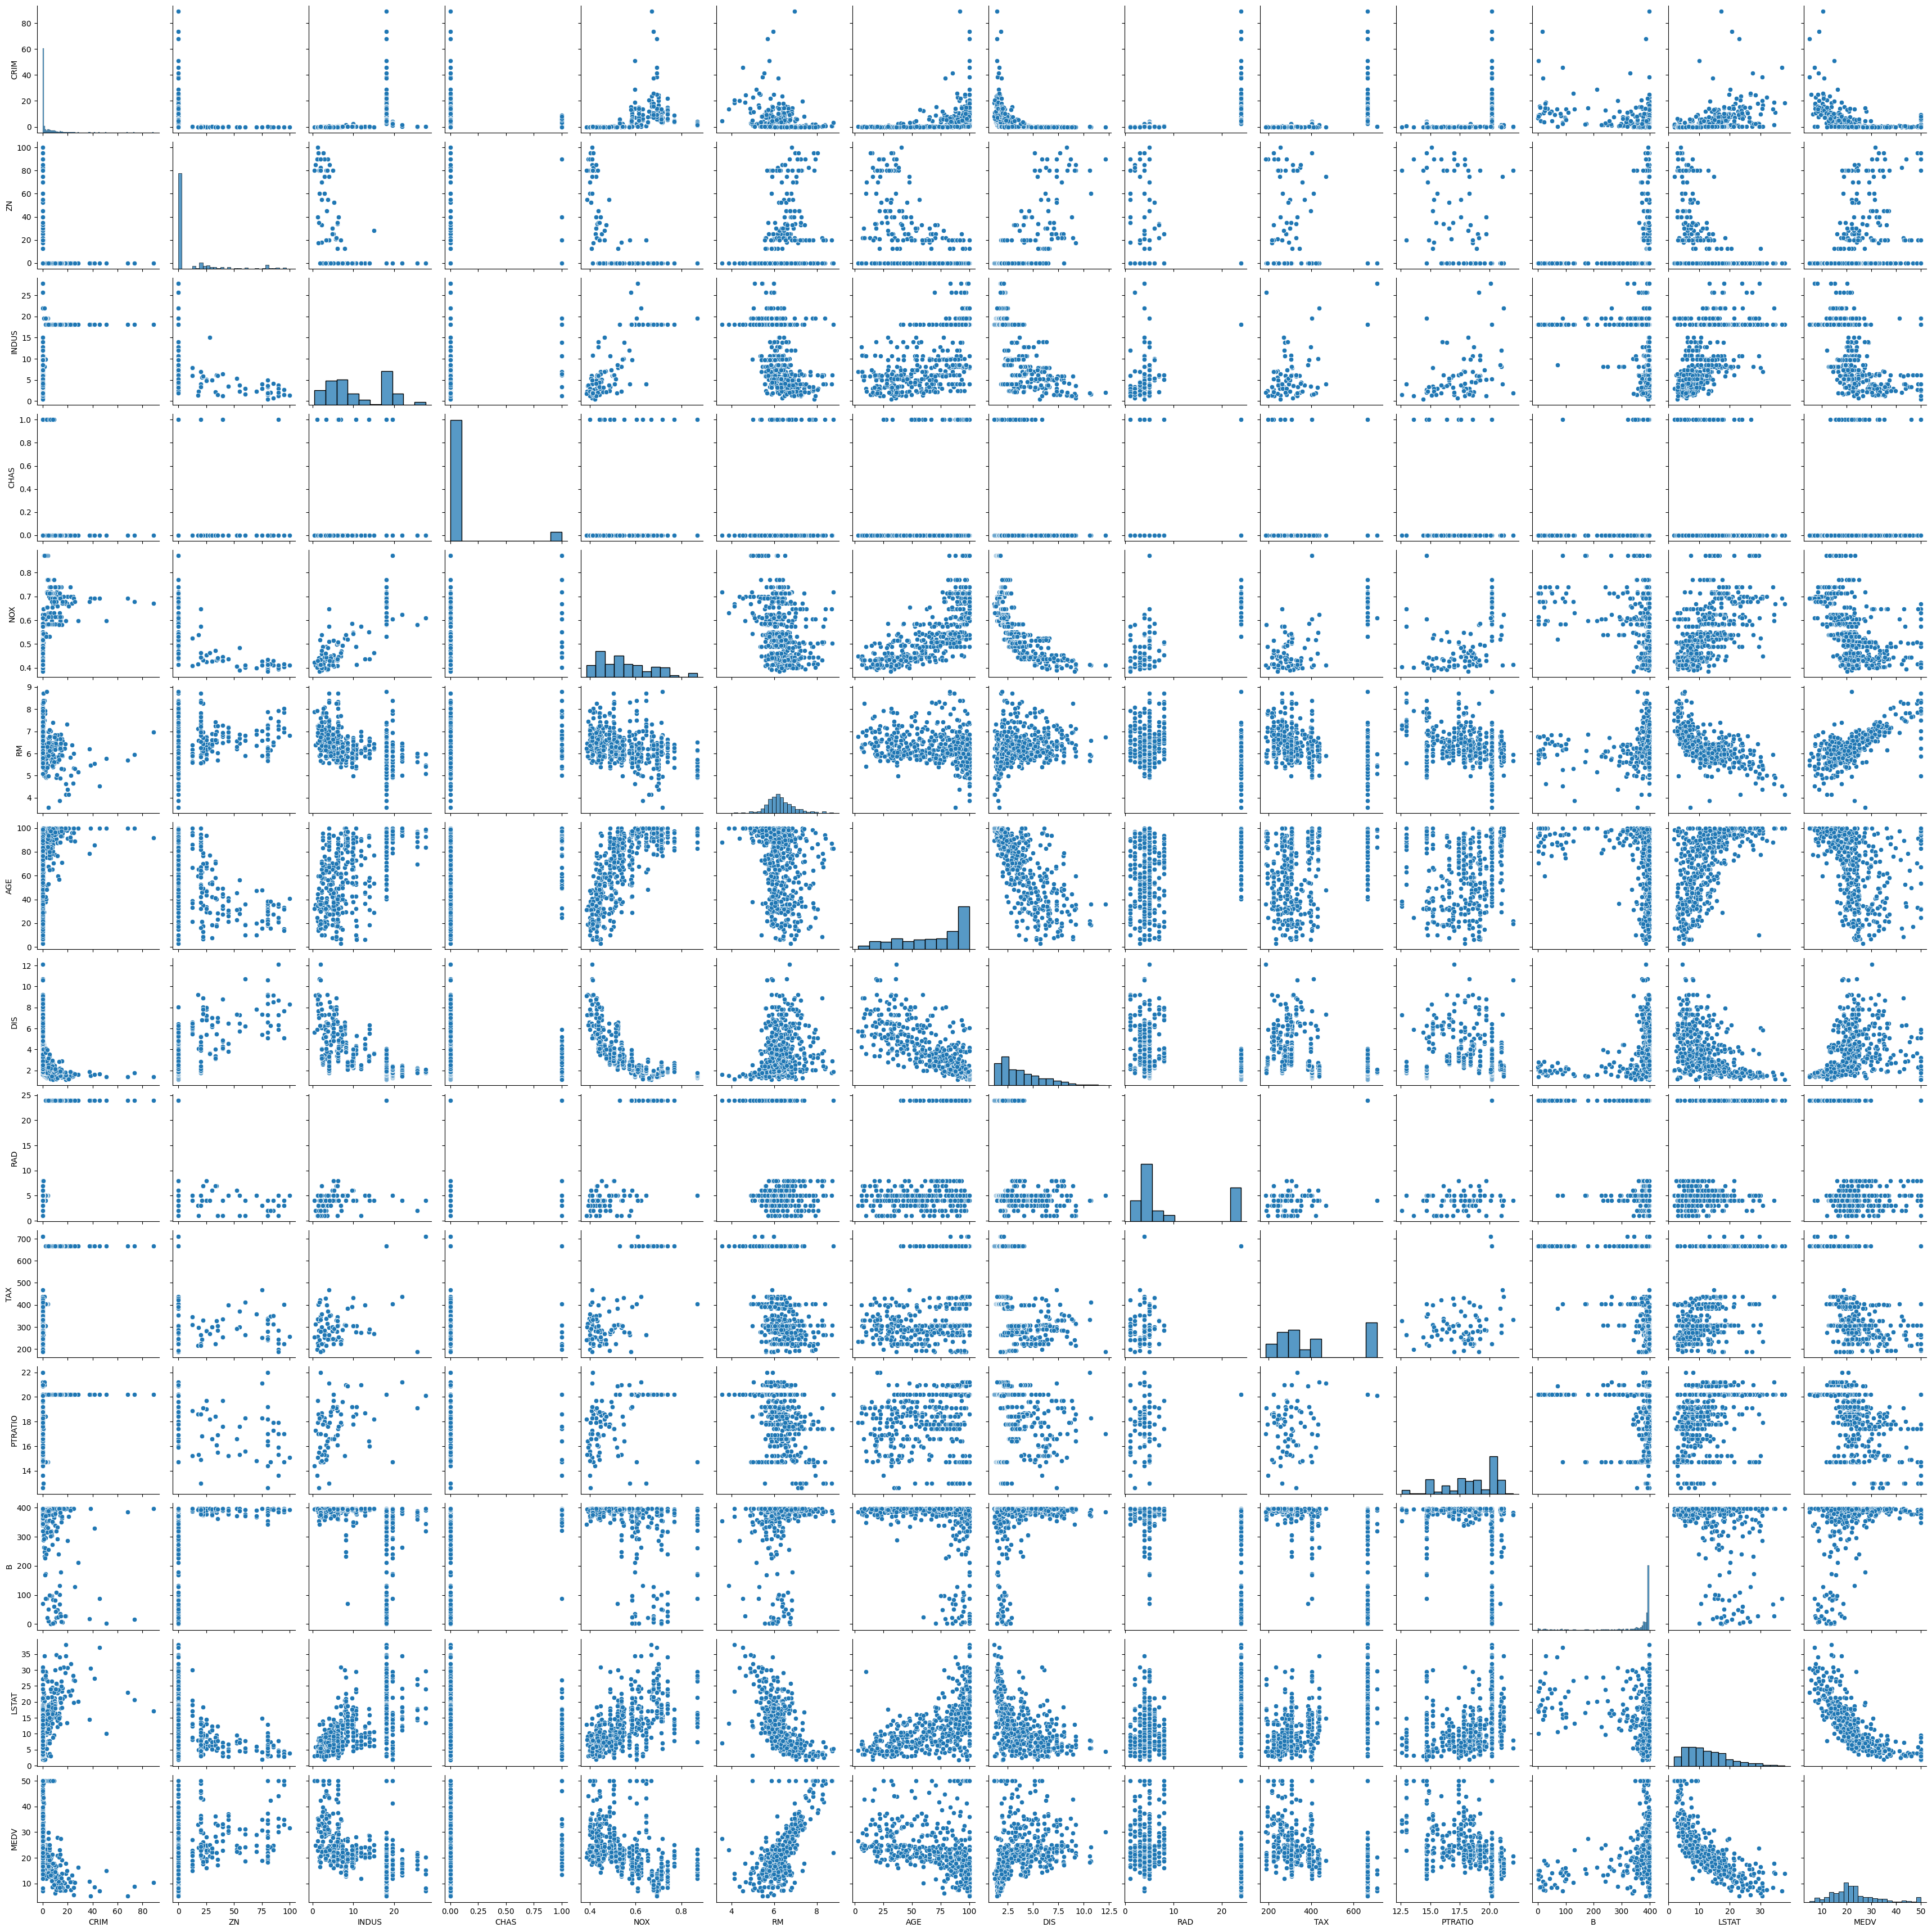

In [ ]:
#Scatterplot matrix containing the relationships between all features
#There are many pictures I don't need, just look at each column vs. the "MEDV" column
#each column vs. the "MEDV" column（the last row of the big picture）
sns.pairplot(data[column_list])
plt.show()

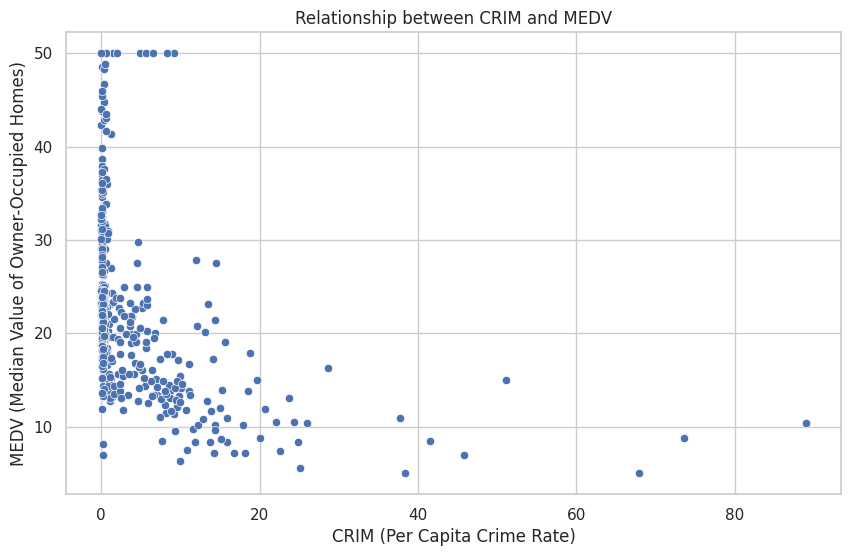

In [ ]:
#This small picture is located in the first column and last row of the larger picture above.
#The first row and last column is its mirror image, with the x- and y-axes reversed.
#This code is an example of the part of the big picture above that I need to analyze.

#Set graphic style
sns.set(style="whitegrid")

#Create a scatter plot of "CRIM" versus "MEDV"
#We can see that housing prices,
#no matter how high or low,
#are concentrated in places with low crime rates.
#The CRIM column is one of the important indicators.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CRIM', y='MEDV', data=data)
plt.title('Relationship between CRIM and MEDV')
plt.xlabel('CRIM (Per Capita Crime Rate)')
plt.ylabel('MEDV (Median Value of Owner-Occupied Homes)')
plt.show()
#We can use the same method to analyze the relationship diagram between the above features, each column vs MEDV column
#That is, we can observe the last row of the previous big picture, they are the individual columns VS the "MEDV" column
#You can see that both "RM" and "LSTAT" seem to have some impact on "MEDV"
#Their scatter plots have some shape and pattern

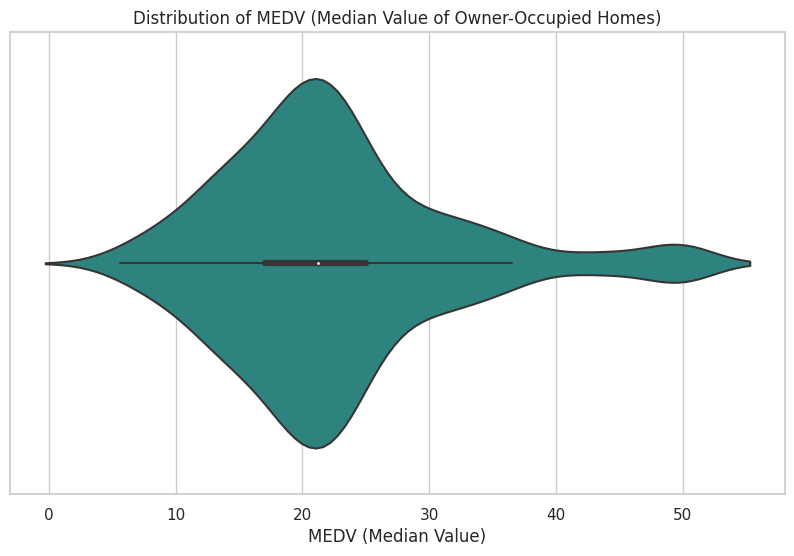

In [ ]:
#Let me first see what information "MEDV" has

sns.set(style="whitegrid")

#Create a violin plot of the "MEDV" column
plt.figure(figsize=(10, 6))
sns.violinplot(x=data['MEDV'], palette='viridis')
plt.title('Distribution of MEDV (Median Value of Owner-Occupied Homes)')
plt.xlabel('MEDV (Median Value)')
plt.show()

#The median house price is mostly concentrated around "20"

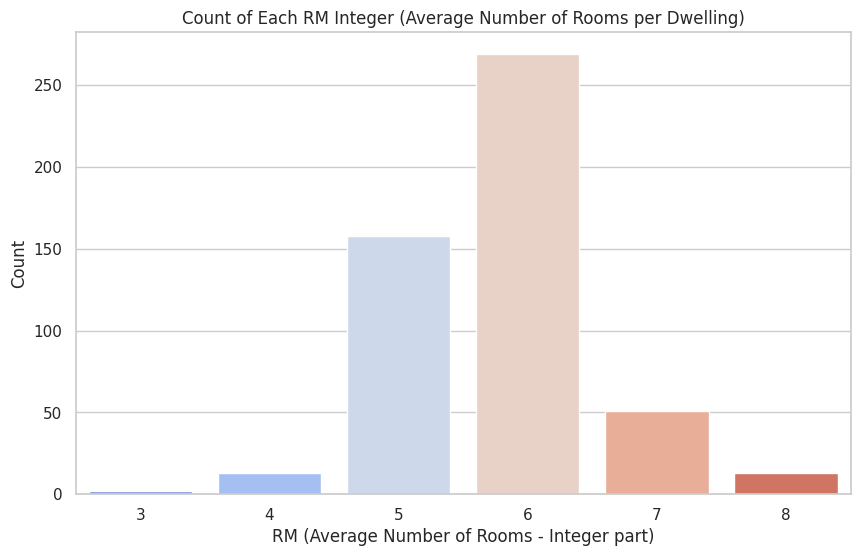

In [ ]:
#Extract the integer part of the "RM" column
#The RM column is the average of the number of rooms,
#so there are decimals. I want to take an integer to see the general situation.
data['RM_integer'] = data['RM'].astype(int)

#Set graphic style
sns.set(style="whitegrid")

#Create a histogram of the "RM_integer" column
plt.figure(figsize=(10, 6))
sns.countplot(x='RM_integer', data=data, palette='coolwarm')
plt.title('Count of Each RM Integer (Average Number of Rooms per Dwelling)')
plt.xlabel('RM (Average Number of Rooms - Integer part)')
plt.ylabel('Count')
plt.show()

#It seems that there are more houses with six rooms.

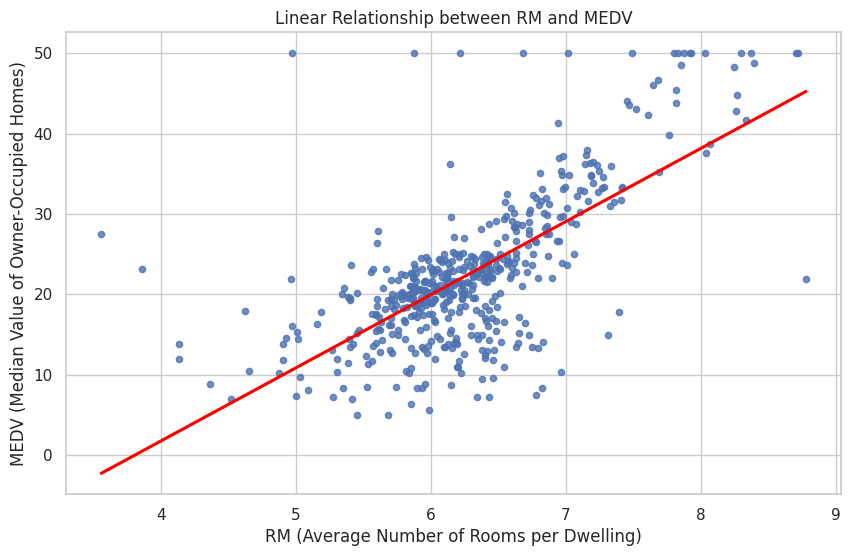

In [ ]:
#I did a linear analysis. According to common sense, the more rooms there are,
#the more expensive the house price will be (other conditions being equal)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(x='RM', y='MEDV', data=data, scatter_kws={'s': 20}, ci=None, line_kws={'color': 'red'})
plt.title('Linear Relationship between RM and MEDV')
plt.xlabel('RM (Average Number of Rooms per Dwelling)')
plt.ylabel('MEDV (Median Value of Owner-Occupied Homes)')
plt.show()

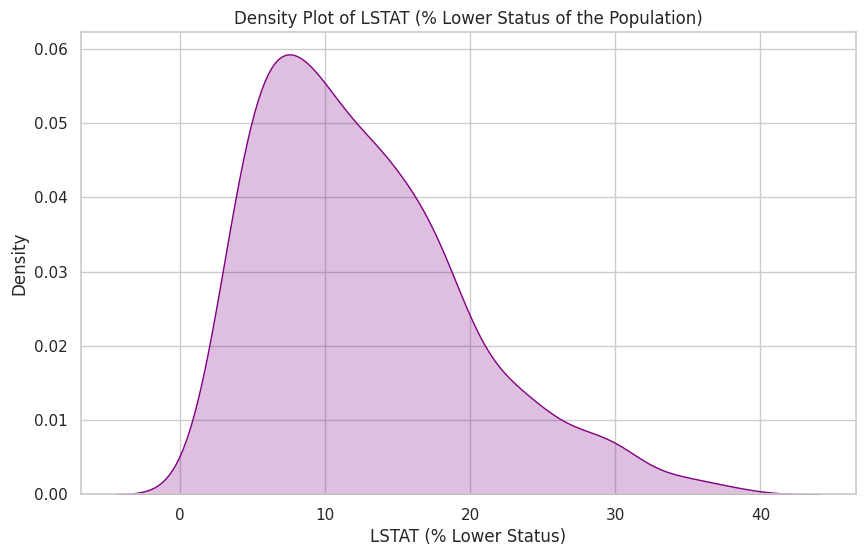

In [ ]:
#Look at the "LSTAT" column
plt.figure(figsize=(10, 6))
sns.kdeplot(data['LSTAT'], fill=True, color='purple')
plt.title('Density Plot of LSTAT (% Lower Status of the Population)')
plt.xlabel('LSTAT (% Lower Status)')
plt.ylabel('Density')
plt.show()

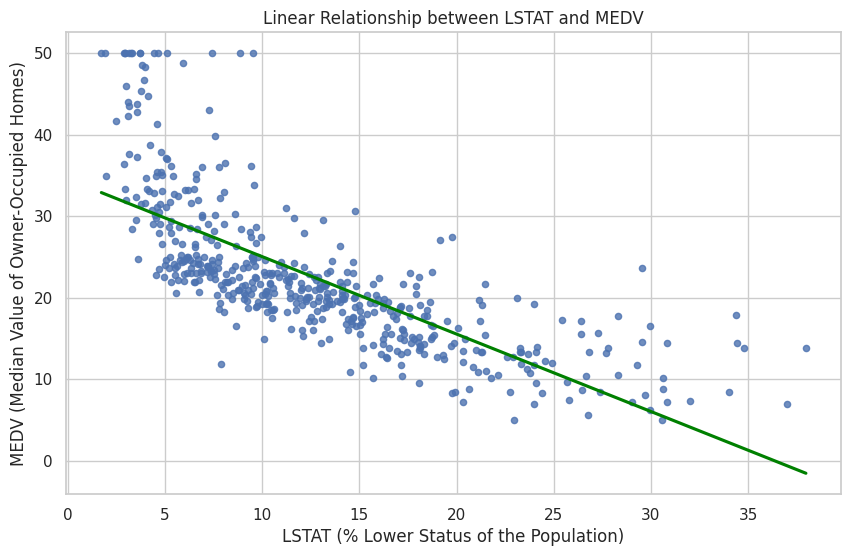

In [ ]:
#The lower the population status, the cheaper the housing prices, which is also a normal phenomenon.
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(x='LSTAT', y='MEDV', data=data, scatter_kws={'s': 20}, ci=None, line_kws={'color': 'green'})
plt.title('Linear Relationship between LSTAT and MEDV')
plt.xlabel('LSTAT (% Lower Status of the Population)')
plt.ylabel('MEDV (Median Value of Owner-Occupied Homes)')
plt.show()

#Later I will look at some of the impacts on housing prices

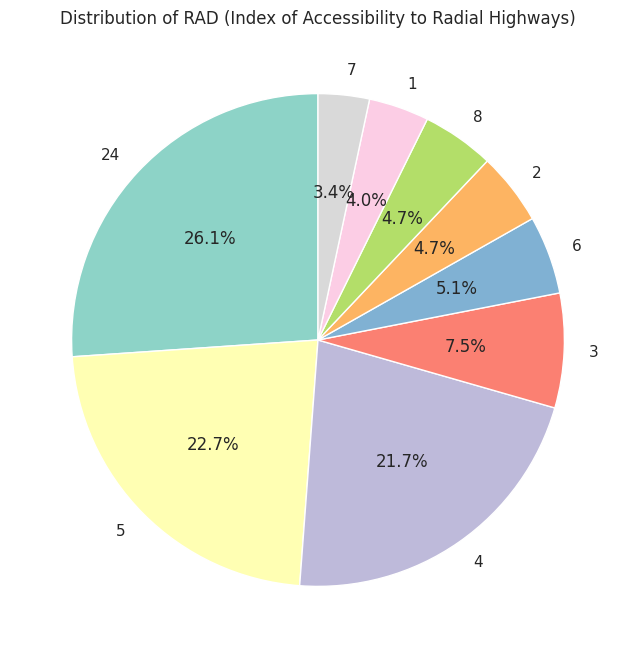

In [ ]:
#Set graphic style
sns.set(style="whitegrid")

#Calculate the proportion of each level in the "RAD" column
rad_counts = data['RAD'].value_counts()

#Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(rad_counts, labels=rad_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Distribution of RAD (Index of Accessibility to Radial Highways)')
plt.show()

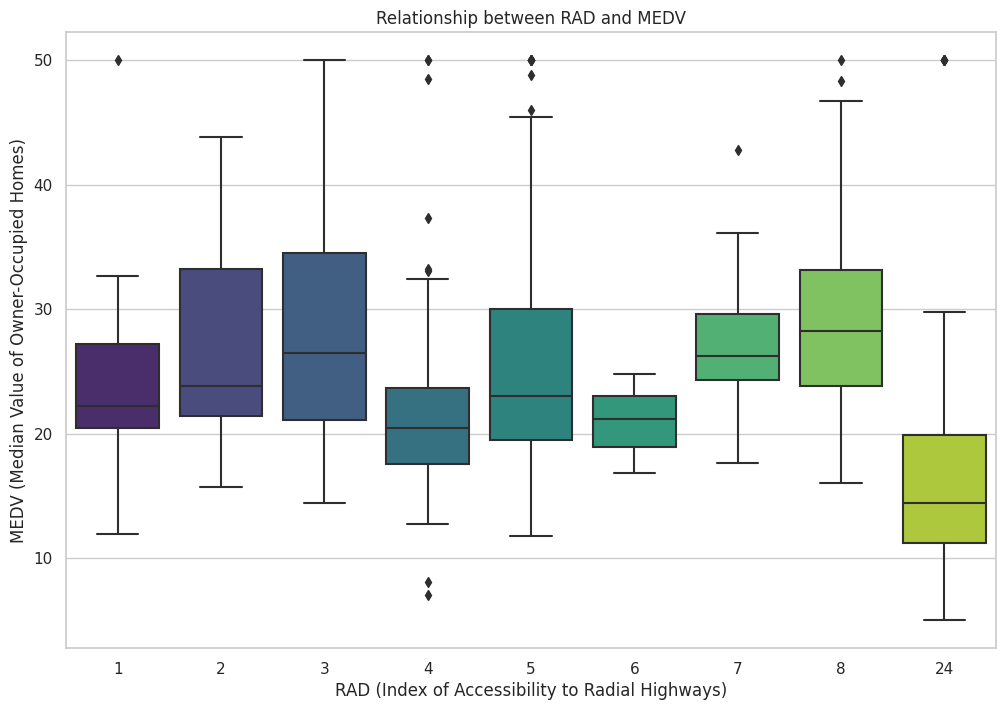

In [ ]:
sns.set(style="whitegrid")
#Create a boxplot of the "RAD" column and the "MEDV" column
plt.figure(figsize=(12, 8))
sns.boxplot(x='RAD', y='MEDV', data=data, palette='viridis', order=data['RAD'].sort_values().unique())
plt.title('Relationship between RAD and MEDV')
plt.xlabel('RAD (Index of Accessibility to Radial Highways)')
plt.ylabel('MEDV (Median Value of Owner-Occupied Homes)')
plt.show()

#It seems that too high a "RAD" value is not a good thing
#Because the median house price here is lower than other median house prices with lower RAD levels

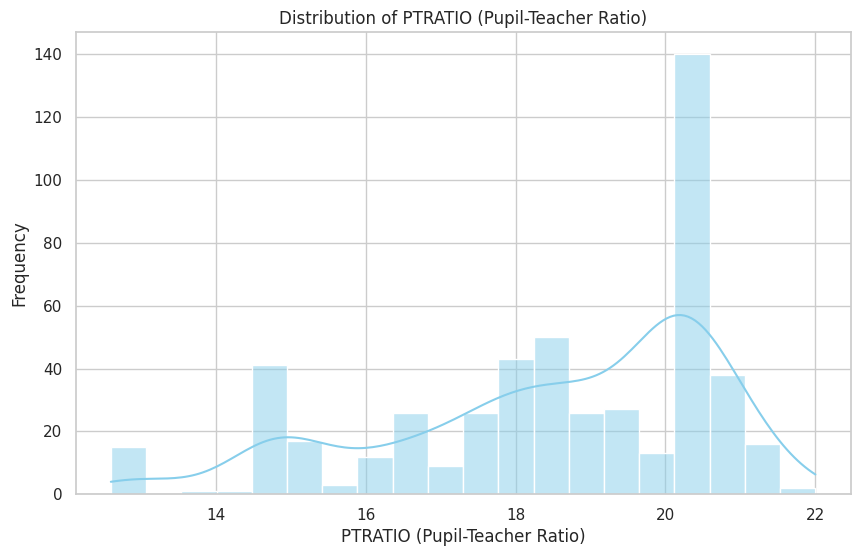

In [ ]:
sns.set(style="whitegrid")

#Create a histogram of the "PTRATIO" column
plt.figure(figsize=(10, 6))
sns.histplot(data['PTRATIO'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of PTRATIO (Pupil-Teacher Ratio)')
plt.xlabel('PTRATIO (Pupil-Teacher Ratio)')
plt.ylabel('Frequency')
plt.show()

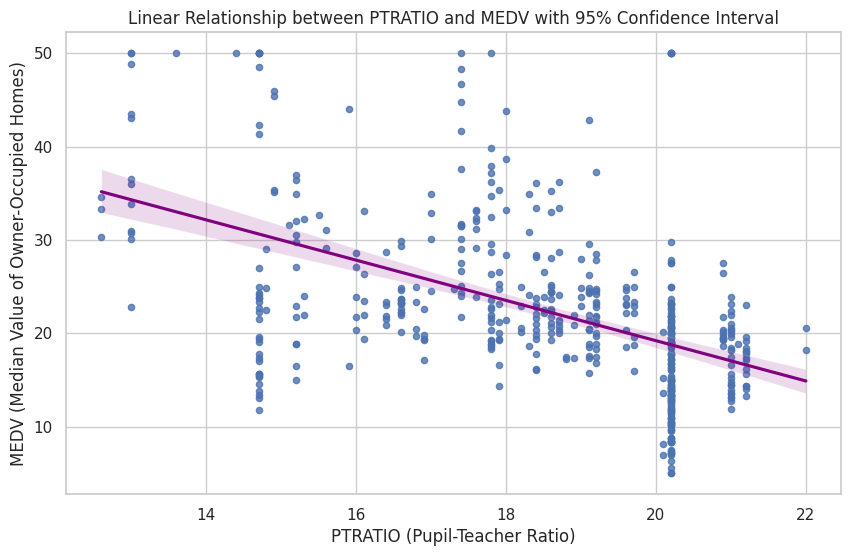

In [ ]:
sns.set(style="whitegrid")

#The scatterplot shows the linear relationship between the "PTRATIO" column and the "MEDV" column,
#with a purple linear regression fit line fitted.
#95% confidence interval
plt.figure(figsize=(10, 6))
sns.regplot(x='PTRATIO', y='MEDV', data=data, scatter_kws={'s': 20}, ci=95, line_kws={'color': 'purple'})
plt.title('Linear Relationship between PTRATIO and MEDV with 95% Confidence Interval')
plt.xlabel('PTRATIO (Pupil-Teacher Ratio)')
plt.ylabel('MEDV (Median Value of Owner-Occupied Homes)')
plt.show()

#The higher the student-teacher ratio, the cheaper the housing prices will be.
#There are fewer teachers and students, which is a bit like elite education.
#Only wealthy families may choose it, and the corresponding housing prices may also be high, I guess.

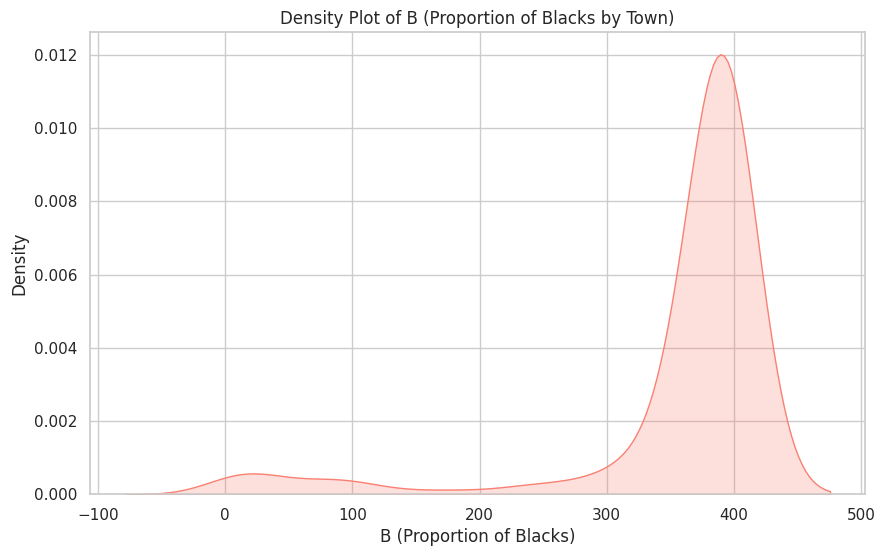

In [ ]:
#Create a density plot of column "B"
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(data['B'], fill=True, color='salmon')
plt.title('Density Plot of B (Proportion of Blacks by Town)')
plt.xlabel('B (Proportion of Blacks)')
plt.ylabel('Density')
plt.show()

#Most of the data is concentrated around 400

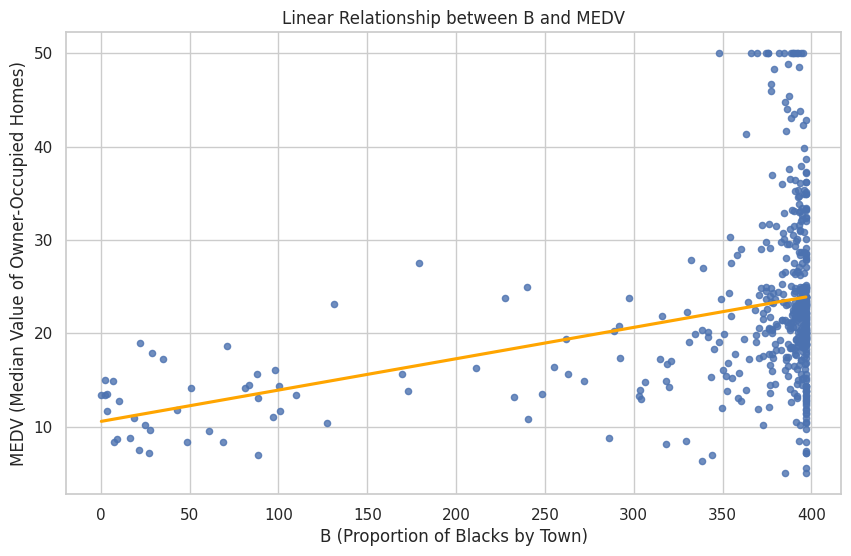

In [ ]:
#This set of data doesn’t look easy to analyze.
#It seems that the more demand there is, the higher the housing prices will be.
#When there are more people, there will be more needs.
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(x='B', y='MEDV', data=data, scatter_kws={'s': 20}, ci=None, line_kws={'color': 'orange'})
plt.title('Linear Relationship between B and MEDV')
plt.xlabel('B (Proportion of Blacks by Town)')
plt.ylabel('MEDV (Median Value of Owner-Occupied Homes)')
plt.show()

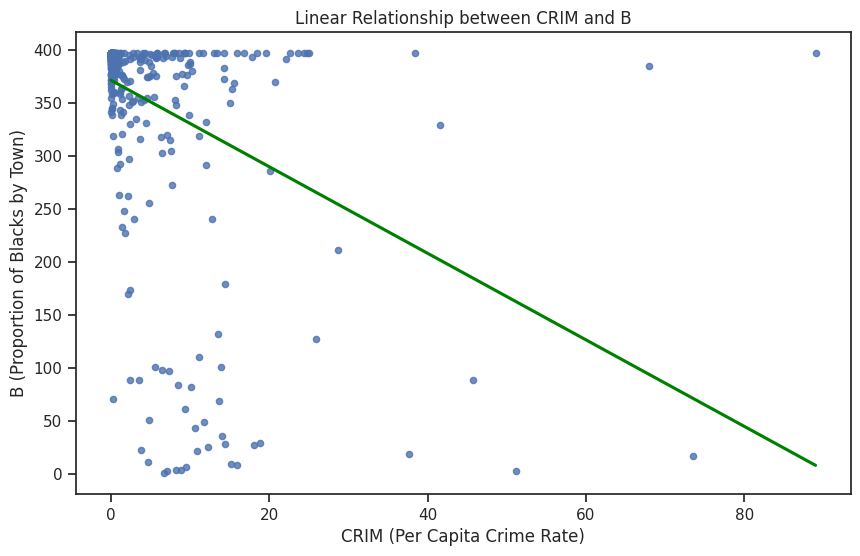

In [ ]:
#"CRIM" column and "B" column
#More crime, fewer people
sns.set(style="ticks")
plt.figure(figsize=(10, 6))
sns.regplot(x='CRIM', y='B', data=data, scatter_kws={'s': 20}, ci=None, line_kws={'color': 'green'})
plt.title('Linear Relationship between CRIM and B')
plt.xlabel('CRIM (Per Capita Crime Rate)')
plt.ylabel('B (Proportion of Blacks by Town)')
plt.show()

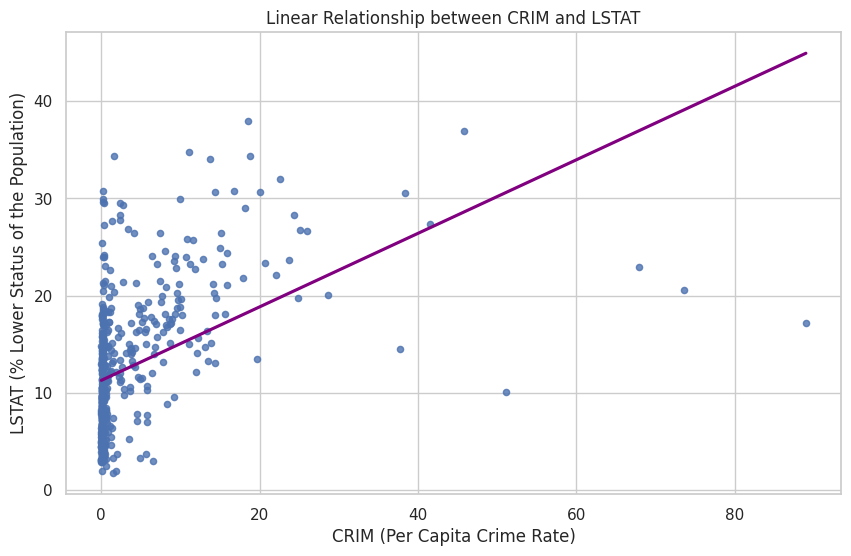

In [ ]:
#Scatter plot and linear regression fit line for column "CRIM" and column "LSTAT"
#The lower the status of a place, the more likely it is to breed crime.
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(x='CRIM', y='LSTAT', data=data, scatter_kws={'s': 20}, ci=None, line_kws={'color': 'purple'})
plt.title('Linear Relationship between CRIM and LSTAT')
plt.xlabel('CRIM (Per Capita Crime Rate)')
plt.ylabel('LSTAT (% Lower Status of the Population)')
plt.show()

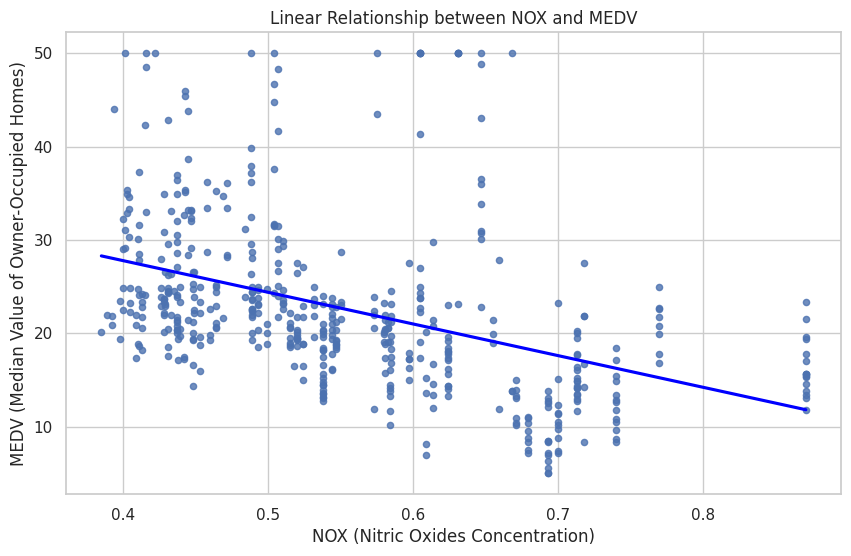

In [ ]:
#"NOX" column and "MEDV" column
#Nitric oxide is unstable and is easily converted into nitrogen dioxide in the air, causing irritation.
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(x='NOX', y='MEDV', data=data, scatter_kws={'s': 20}, ci=None, line_kws={'color': 'blue'})
plt.title('Linear Relationship between NOX and MEDV')
plt.xlabel('NOX (Nitric Oxides Concentration)')
plt.ylabel('MEDV (Median Value of Owner-Occupied Homes)')
plt.show()
#The higher the concentration of nitric oxide, the cheaper the house, because it is not good for the human body.

#Let’s stop the analysis here. Each factor affects housing prices separately.